# Problem Statement:

Build a recommender system by using cosine simillarties score.

## Book recommendations based on correlation

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv('book.csv', encoding='latin1')

In [3]:
data.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
data.describe()

,Unnamed: 0,User.ID,Book.Rating
count,10000.00000,10000.000000,10000.00000
mean,5000.50000,95321.249800,7.56630
std,2886.89568,117645.703609,1.82152
min,1.00000,8.000000,1.00000
25%,2500.75000,2103.000000,7.00000
50%,5000.50000,3757.000000,8.00000
75%,7500.25000,162052.000000,9.00000
max,10000.00000,278854.000000,10.00000


# EDA

In [6]:
data.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(10000, 4)

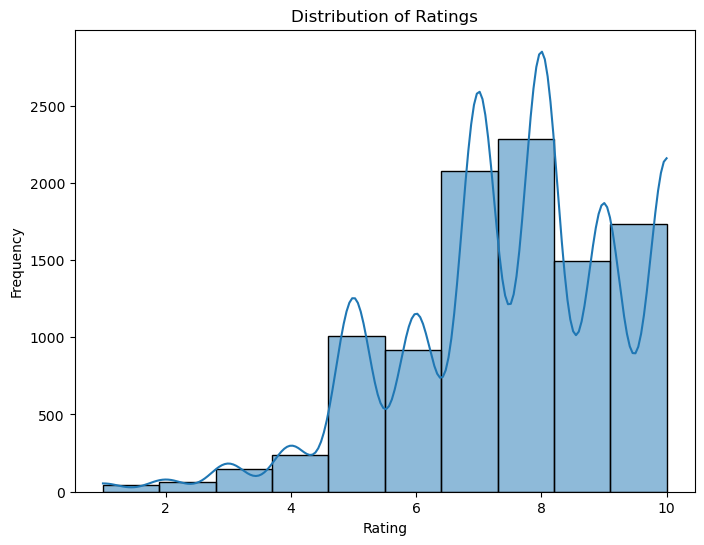

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Book.Rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [10]:
df1 = data.iloc[:,1:]

In [11]:
df1.columns = ['userID', 'title', 'rating']

In [12]:
df1.head()

,userID,title,rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [13]:
# Explore dataset
print('# of records:', len(df1))
print('# of books:', len(df1['title'].unique()))
print('# of users:', len(df1['userID'].unique()))

# of records: 10000
# of books: 9659
# of users: 2182


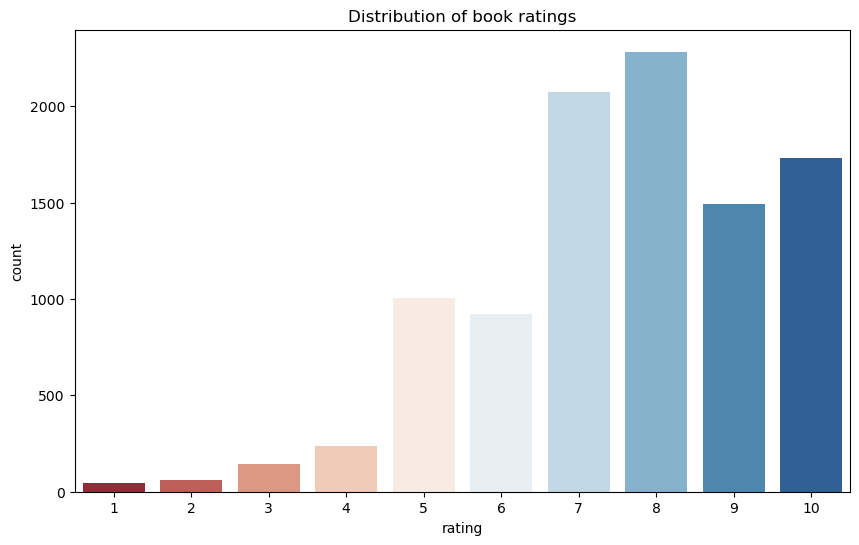

In [14]:
# Visualize the distribution of book ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df1, palette=sns.color_palette("RdBu", 10))
plt.title('Distribution of book ratings')
plt.show()

In [15]:
# Build a book-user rating matrix
rating_matrix = df1.pivot_table(index='userID', columns='title', values='rating', fill_value=0)

In [16]:
# Calculate book correlations
book_correlations = np.corrcoef(rating_matrix.T)

In [17]:
# Function to get book recommendations based on correlation
def get_recommendations(books_list):
    book_similarities = np.zeros(book_correlations.shape[0])

    for book in books_list:
        book_index = df1['title'].tolist().index(book)
        book_similarities += book_correlations[book_index]

    book_preferences = [(book, similarity) for book, similarity in zip(df1['title'].unique(), book_similarities)]
    sorted_preferences = sorted(book_preferences, key=lambda x: x[1], reverse=True)
    return sorted_preferences[:10]

In [18]:
# Get recommendations for a specific user or favorite books
user_id = 276747
user_books = df1[df1['userID'] == user_id]['title'].unique()
recommended_books = get_recommendations(user_books)

print(f"Top 10 book recommendations for User {user_id}:")
for book, similarity in recommended_books:
    print(f"Book: {book}, Similarity: {similarity:.4f}")

Top 10 book recommendations for User 276747:
Book: Nights Below Station Street, Similarity: 0.9982
Book: Hitler's Secret Bankers: The Myth of Swiss Neutrality During the Holocaust, Similarity: 0.9982
Book: Prescription for Terror, Similarity: 0.9982
Book: The Amber Spyglass (His Dark Materials, Book 3), Similarity: 0.9982
Book: The Snow Garden, Similarity: 0.9982
Book: The Doorbell Rang (The Best Mysteries of All Time), Similarity: 0.9982
Book: TrÃ nsit (Area contemporÃ nia), Similarity: 0.9982
Book: And Never Let Her Go : Thomas Capano: The Deadly Seducer, Similarity: 0.9982
Book: The True and Outstanding Adventures of the Hunt Sisters: A Novel, Similarity: 0.9982
Book: Suzanne's Diary for Nicholas, Similarity: 0.9982


In [19]:
# Example: Recommendations based on favorite books
my_fav_books = ['Classical Mythology', 'Clara Callan']
recommended_books = get_recommendations(my_fav_books)

print('\nTop 10 book recommendations based on my favorite books:')
for book, similarity in recommended_books:
    print(f"Book: {book}, Similarity: {similarity:.4f}")



Top 10 book recommendations based on my favorite books:
Book: Classical Mythology, Similarity: 2.0000
Book: Clara Callan, Similarity: 2.0000
Book: Decision in Normandy, Similarity: 2.0000
Book: The Unknown Errors of Our Lives: Stories, Similarity: 2.0000
Book: Stud (Harlequin Temptations, No 357), Similarity: 2.0000
Book: Citizens: A Chronicle of the French Revolution, Similarity: -0.0009
Book: Deus Irae, Similarity: -0.0009
Book: Climbing Mt. Shasta: Route 1, Avalanche Gulch, Similarity: -0.0009
Book: Indigo 1: Nemesis (Indigo Series), Similarity: -0.0009
Book: The Biggest House in the World (Knopf Children's Paperbacks), Similarity: -0.0009


## Book recommendation system using cosine similarity:

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [21]:
# Data Pre-Processing
data.rename(columns={'Unnamed: 0': 'index', 'User.ID': 'user_id', 'Book.Title': 'title', 'Book.Rating': 'rating'}, inplace=True)
data.set_index('index', inplace=True)

In [22]:
# Collaborative Book Recommendation System
# Item-Based Collaborative Filtering
user_data_df = data.pivot_table(index='user_id', columns='title', values='rating').fillna(0)

In [23]:
# Calculate Cosine Similarity between Users
user_sim = 1 - pairwise_distances(user_data_df.values, metric='cosine')
user_sim_df = pd.DataFrame(user_sim, index=user_data_df.index, columns=user_data_df.index)
np.fill_diagonal(user_sim, 0)

In [24]:
# Recommend data based on Cosine Similarity
def recommend_data(user_id):
    similar_users = user_sim_df.sort_values(user_id, ascending=False).head(100).index
    recommended_data = set()
    
    for similar_user in similar_users:
        user_data = data[data['user_id'] == similar_user]['title']
        recommended_data.update(user_data)
    
    user_data_read = data[data['user_id'] == user_id]['title']
    recommendations = recommended_data - set(user_data_read)
    
    return recommendations

In [25]:
# Example usage:
recommended_data_for_user_14 = recommend_data(14)
recommended_data_for_user_8 = recommend_data(8)

In [26]:
print("Recommended data for User 14:")
print(pd.DataFrame(recommended_data_for_user_14))

Recommended data for User 14:
                                                     0
0                              Interpreter of Maladies
1                       Nights in the Gardens of Spain
2                           Fire Wall (Checkered Flag)
3    Fresh For '01... You Suckas: A Boondocks Colle...
4                     Prince: And Other Dogs 1850-1940
..                                                 ...
477  She's Gone Country: Dispatches from a Lost Sou...
478                                       Modern Women
479   No More Dying Then! (Vintage Crime/Black Lizard)
480  Jaguars Ripped My Flesh: Adventure Is a Risky ...
481                          Lee Wade's Korean Cookery

[482 rows x 1 columns]


In [27]:
print("\nRecommended data for User 8:")
print(pd.DataFrame(recommended_data_for_user_8))


Recommended data for User 8:
                                                     0
0                              Interpreter of Maladies
1                       Nights in the Gardens of Spain
2                           Fire Wall (Checkered Flag)
3    Fresh For '01... You Suckas: A Boondocks Colle...
4                     Prince: And Other Dogs 1850-1940
..                                                 ...
470  She's Gone Country: Dispatches from a Lost Sou...
471                                       Modern Women
472   No More Dying Then! (Vintage Crime/Black Lizard)
473  Jaguars Ripped My Flesh: Adventure Is a Risky ...
474                          Lee Wade's Korean Cookery

[475 rows x 1 columns]
